# These codes are for guidance and setting an example for using the Axesso API from RapidAPI to collect Amazon reviews. Thanks for Axesso API for making the process so easy.

BY: Vincent Chen


---




# **1.Resgister and get the key**

You need to go to https://rapidapi.com/axesso/api/Axesso%20-%20Amazon%20Data%20Service to register an account, and follow the settings in the picture below for the **Key replacement** in later codes.

(You can still run all the codes without registration, just to check if it works)

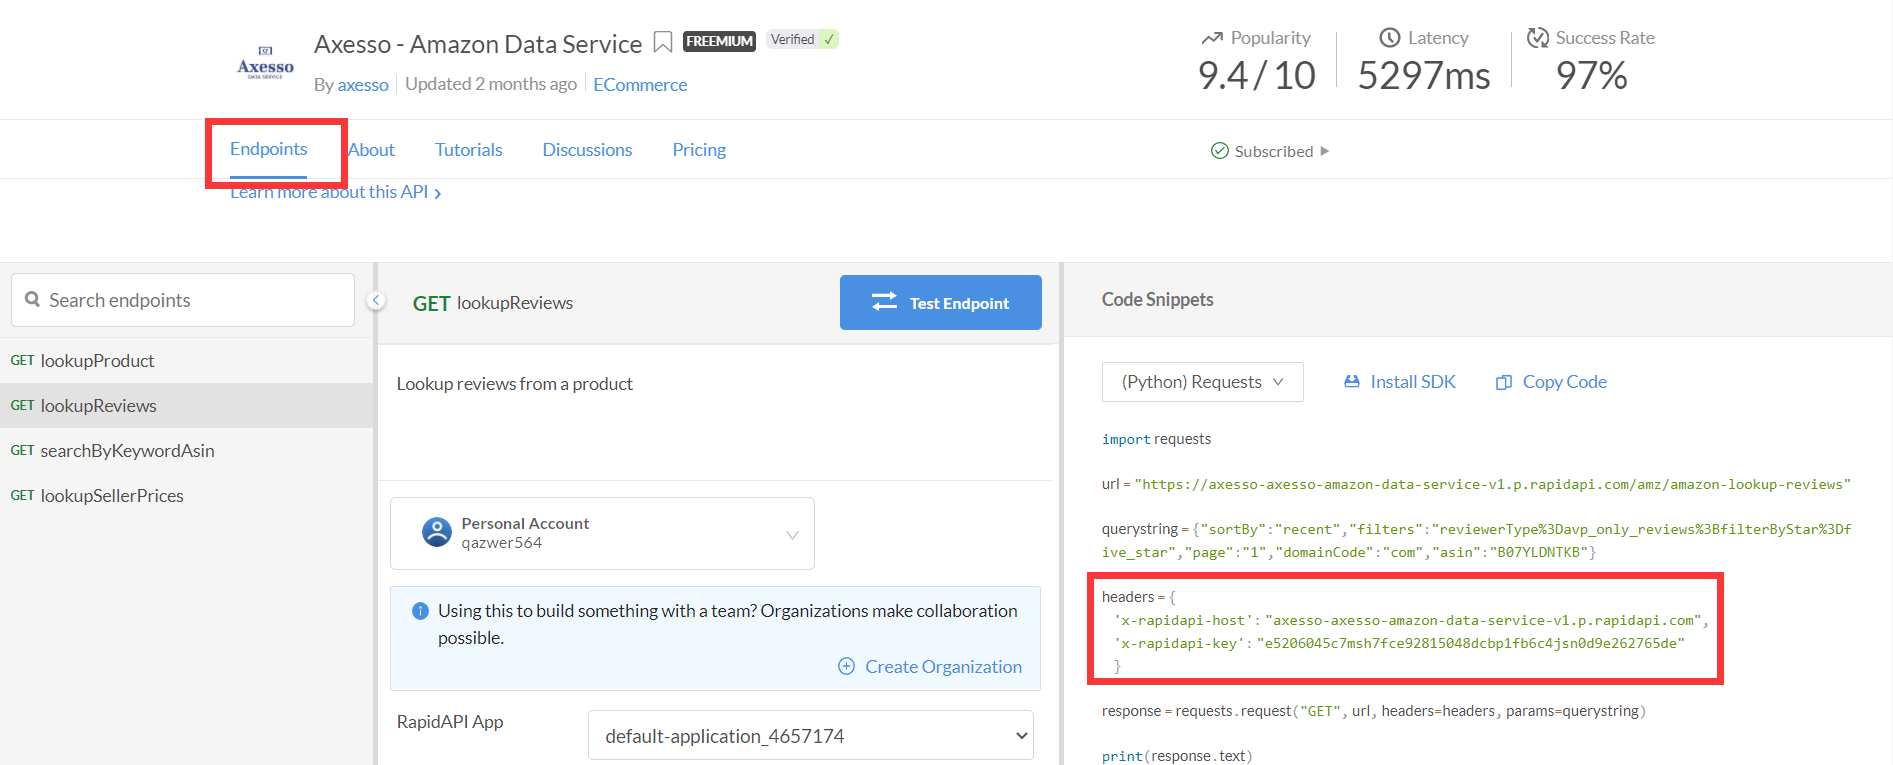

# **2.Get product IDs**

Two ways to do it: 

(1)As picture below shows, you could just copy from the Amazon product link and paste the product ID to later codes.

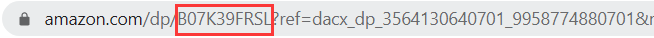

(2)Search by keywords. Run the following codes, you may want to change the **access key** to run it. Each page may give you 40-60 product IDs

In [10]:
import requests

url = "https://axesso-axesso-amazon-data-service-v1.p.rapidapi.com/amz/amazon-search-by-keyword-asin"

querystring = {"sortBy":"relevanceblender","domainCode":"com","keyword":"cable","page":"1"}  # Change the keyword here to replace 'cable'

headers = {
    'x-rapidapi-host': "axesso-axesso-amazon-data-service-v1.p.rapidapi.com",
    'x-rapidapi-key': "e5206045c7msh7fce92815048dcbp1fb6c4jsn0d9e262765de"  # Change the key here after registration
    }

response = requests.request("GET", url, headers=headers, params=querystring)

import json
ids = json.loads(response.text)
ids['foundProducts']

['B08BY8NDNR',
 'B003YDK49M',
 'B000P70I6Y',
 'B00N2VILDM',
 'B003FVX8GE',
 'B07D9C8NP2',
 'B07DC5PPFV',
 'B076FPGWNZ',
 'B00WD017GQ',
 'B07DC9SBLQ',
 'B00NH11H38',
 'B07VQYLXJC',
 'B00NO73MUQ',
 'B00WD017BG',
 'B00PHVGGMI',
 'B07VVQDN29',
 'B0814PXB11',
 'B07VSZ8H5X',
 'B089W9RGXX',
 'B00J09V1WS',
 'B01LYYTTTJ',
 'B07HDBZN7Q',
 'B014I8SSD0',
 'B01M0GB8CC',
 'B08BKNRL5F',
 'B0791TX5P5',
 'B00EUHRLF6',
 'B087G8L9TN',
 'B01CSZAYF0',
 'B081V758PN',
 'B07H256MBK',
 'B07QVL8ZXW',
 'B07ZCVQQ52',
 'B07ZNT29ZF',
 'B00PJ2OSIO',
 'B07QLXC6QR',
 'B07M89LV8J',
 'B00G9BN9KW',
 'B01K5YWLZ2',
 'B07RZPVFYM',
 'B079QHML21',
 'B07X37CG9V',
 'B086X32FHW',
 'B01DN7NM4M',
 'B0813HNTQV',
 'B07K749374',
 'B07CRG94G3',
 'B08DBNWSL8',
 'B07H42QXF1',
 'B00R92CL5E',
 'B07PXGQC1Q',
 'B07ZRDGF6Y',
 'B083KG63KJ',
 'B0054R0SG0',
 'B0897VRG44',
 'B08DDB4M5Q',
 'B07YB3JTQ9',
 'B07F4GGFVZ',
 'B00XIG2T0C',
 'B073RZXXCN']

# **3.Get the reviews**
Now you can run the following codes to get the reviews:

In [11]:
import requests

url = "https://axesso-axesso-amazon-data-service-v1.p.rapidapi.com/amz/amazon-lookup-reviews"



headers = {
    'x-rapidapi-host': "axesso-axesso-amazon-data-service-v1.p.rapidapi.com",
    'x-rapidapi-key': "e5206045c7msh7fce92815048dcbp1fb6c4jsn0d9e262765de"    #you need to register to get a key to replace the key here
    }

import pandas as pd
total_df = pd.DataFrame(None)



#################   the only input part   ########################


# asin_list = ['B07T3TWPPC','B07N19X65D','B07YLDNTKB']  
# You could put multiple IDs inside as long as keeping this format

asin_list = ['B07T3TWPPC']



###########################################################################



for single_asin in asin_list:

  querystring = {"sortBy":"recent","filters":"reviewerType%3Dall_reviews","page":1,"domainCode":"com","asin":single_asin}
  # You could change the collction settings here as you want, remember to keep settings the same in later codes

  response = requests.request("GET", url, headers=headers, params=querystring)


  import json
  page_1 = json.loads(response.text)
  
  # Setting review upper limit per product, here is 100, which means 1000 reviews per product
  if page_1['lastPage'] >= 100:
    page_range = range(1,101)

  else: page_range = range(1,page_1['lastPage']+1)
  # It means that if there are less than 100 pages, collect all the reviews   


  for page_num in page_range:

    querystring = {"sortBy":"recent","filters":"reviewerType%3Dall_reviews","page":page_num,"domainCode":"com","asin":single_asin}
    # You could change the collction settings here as you want, remember to keep settings the same in previous codes


    response = requests.request("GET", url, headers=headers, params=querystring)


    print(response.text)

    # Output page info
    import json
    page = json.loads(response.text)

    # Setting empty lists for every page of collection
    date = []
    imageUrlList = []
    numberOfHelpful = []
    parentReviewId = []
    rating = []
    reviewId = []
    text = []
    title = []
    username = []
    verified = []

    # The loop for collcting info
    for rev in page['reviews']:
      date.append(rev['date'])
      imageUrlList.append(rev['imageUrlList'])
      numberOfHelpful.append(rev['numberOfHelpful'])
      parentReviewId.append(rev['parentReviewId'])
      rating.append(rev['rating'])
      reviewId.append(rev['reviewId'])
      text.append(rev['text'])
      title.append(rev['title'])
      username.append(rev['userName'])
      verified.append(rev['verified'])    

    # Making up the dataset
    data_dict = {'asin':page['asin'],'productTitle':page['productTitle'],
            'countReviews':page['countReviews'],     
            'date':date, 'imageUrlList':imageUrlList, 'numberOfHelpful':numberOfHelpful,
            'parentReviewId':parentReviewId, 'rating':rating, 'reviewId':reviewId,
            'text':text, 'title':title, 'username':username, 'verified':verified
            }
    page_df = pd.DataFrame(data_dict)

    # Merging the dataset for every page
    total_df = pd.concat([total_df,page_df])

# See the first few rows in dataset
total_df

# Notice: some prodcuts may not have any reviews, they would raise an error.
# To fix this, just eliminate that product ID from the input.
# To find out that product ID, inspect the notes below the cell to see which product ID was last scraped,
# the next one is the one with no reviews.
# You can still run the next two cells to output all the reviews we have scraped so far,
# and keep going with other product IDs.


{"responseStatus":"PRODUCT_FOUND_RESPONSE","responseMessage":"Product successfully found!","asin":"B07T3TWPPC","currentPage":1,"sortStrategy":"recent","domainCode":"com","filters":{},"productTitle":"HENGAO Men's Stretch Straight Fit Destroyed Ripped Biker Jeans, 1161 Light Blue, 44","countReviews":33,"lastPage":4,"reviews":[{"reviewId":"R17UQZN3AJINLR","parentReviewId":null,"text":"I purchased these for my teenage son. He had only worn once(hes peticurally easy on clothes and takes care of them), hadn't washed them yet and they literally were falling apart!!! Threads were stringing out down seam and once we washed them, they completely faded and lost all attractiveness!!!!!!!!! I wouldn't ever buy from this manufacturer again!!!!!!","date":"Reviewed in the United States on August 10, 2020","rating":"1.0 out of 5 stars","title":"Crappy material!!!","userName":"Heather","numberOfHelpful":0,"imageUrlList":null,"verified":true},{"reviewId":"R3P537TY99LJW3","parentReviewId":null,"text":"The

,asin,productTitle,countReviews,date,imageUrlList,numberOfHelpful,parentReviewId,rating,reviewId,text,title,username,verified
0,B07T3TWPPC,HENGAO Men's Stretch Straight Fit Destroyed Ri...,33,"Reviewed in the United States on August 10, 2020",None,0,None,1.0 out of 5 stars,R17UQZN3AJINLR,I purchased these for my teenage son. He had o...,Crappy material!!!,Heather,True
1,B07T3TWPPC,HENGAO Men's Stretch Straight Fit Destroyed Ri...,33,"Reviewed in the United States on July 20, 2020",None,0,None,1.0 out of 5 stars,R3P537TY99LJW3,"The pants are knock off’s ,😡😡😡😡😡😡😡😡😡😡😡😡😡!!!",Don’t waste your money,Emmanuel Morton,True
2,B07T3TWPPC,HENGAO Men's Stretch Straight Fit Destroyed Ri...,33,"Reviewed in the United States on July 13, 2020",None,0,None,4.0 out of 5 stars,R393QORUC6A0XD,"But of a lint magnet, otherwise fits and looks...",Four stars,Mason D.,True
3,B07T3TWPPC,HENGAO Men's Stretch Straight Fit Destroyed Ri...,33,"Reviewed in the United States on July 12, 2020",None,0,None,4.0 out of 5 stars,R1OXJ5NCGPCU9F,The sizing was just off. But the quality was g...,Size,Katie L.,True
4,B07T3TWPPC,HENGAO Men's Stretch Straight Fit Destroyed Ri...,33,"Reviewed in the United States on July 10, 2020",None,0,None,5.0 out of 5 stars,RKKU8QAUCN1NC,Very nice jeans shorts,Must have very comfortable,Charles E.,False
5,B07T3TWPPC,HENGAO Men's Stretch Straight Fit Destroyed Ri...,33,"Reviewed in the United States on July 8, 2020",None,0,None,5.0 out of 5 stars,R1QLUTUJQSIY6Q,Man I never felt sexy till I bough these,Sexy man jeans,Christian Hooks,True
6,B07T3TWPPC,HENGAO Men's Stretch Straight Fit Destroyed Ri...,33,"Reviewed in the United States on July 7, 2020",None,0,None,5.0 out of 5 stars,R139X94WFJ6KAD,It's good but the stitching had theses black s...,Good jeans,Eliezer bateau,True
7,B07T3TWPPC,HENGAO Men's Stretch Straight Fit Destroyed Ri...,33,"Reviewed in the United States on July 2, 2020",None,0,None,4.0 out of 5 stars,RRELBZYVXBHA0,soft and comfy my only problem was the rips it...,good,allen landry,True
8,B07T3TWPPC,HENGAO Men's Stretch Straight Fit Destroyed Ri...,33,"Reviewed in the United States on June 27, 2020",None,0,None,5.0 out of 5 stars,RUXOLG8BPLSVO,N/A,N/A,LeEtta Mitchell,True
9,B07T3TWPPC,HENGAO Men's Stretch Straight Fit Destroyed Ri...,33,"Reviewed in the United States on June 20, 2020",None,0,None,4.0 out of 5 stars,RSBM0L45JMNIP,Cannot find these styles in regular stores,Comfortable,Kelly R,False


In [12]:
total_df.info()
# Overview on the dataset collected and built

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 2
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   asin             33 non-null     object
 1   productTitle     33 non-null     object
 2   countReviews     33 non-null     int64 
 3   date             33 non-null     object
 4   imageUrlList     1 non-null      object
 5   numberOfHelpful  33 non-null     int64 
 6   parentReviewId   0 non-null      object
 7   rating           33 non-null     object
 8   reviewId         33 non-null     object
 9   text             33 non-null     object
 10  title            33 non-null     object
 11  username         33 non-null     object
 12  verified         33 non-null     bool  
dtypes: bool(1), int64(2), object(10)
memory usage: 3.4+ KB


In [13]:
# Output your reviews
total_df = total_df.reset_index(drop=True)
total_df = total_df.set_index('reviewId')
total_df.to_csv('reviews_B07T3TWPPC.csv') #change the name you want

# Remember to download/save the csv files
# These codes don't include the data cleaning/merging process